In [1]:
import torch
from models.inference import ConnectFourModel
from models.train import train
from matplotlib import pyplot as plt

model = ConnectFourModel()
model = train(model, batch_size=64, num_epochs=20, discount_factor=0.90)

Epoch 1/20, Loss: 0.4212, Win Rate: 0.9844
Epoch 2/20, Loss: 0.4293, Win Rate: 1.0000
Epoch 3/20, Loss: 0.3753, Win Rate: 0.9844
Epoch 4/20, Loss: 0.2671, Win Rate: 1.0000
Epoch 5/20, Loss: 0.1808, Win Rate: 1.0000
Epoch 6/20, Loss: 0.2074, Win Rate: 0.9531
Epoch 7/20, Loss: 0.2619, Win Rate: 0.9844
Epoch 8/20, Loss: 0.2880, Win Rate: 0.9844
Epoch 9/20, Loss: 0.2578, Win Rate: 1.0000
Epoch 10/20, Loss: 0.2465, Win Rate: 1.0000
Epoch 11/20, Loss: 0.2414, Win Rate: 0.9688
Epoch 12/20, Loss: 0.2289, Win Rate: 1.0000
Epoch 13/20, Loss: 0.2061, Win Rate: 1.0000
Epoch 14/20, Loss: 0.1762, Win Rate: 1.0000
Epoch 15/20, Loss: 0.1266, Win Rate: 1.0000
Epoch 16/20, Loss: 0.0976, Win Rate: 1.0000
Epoch 17/20, Loss: 0.0660, Win Rate: 1.0000
Epoch 18/20, Loss: 0.0548, Win Rate: 1.0000
Epoch 19/20, Loss: 0.0466, Win Rate: 1.0000
Epoch 20/20, Loss: 0.0311, Win Rate: 1.0000


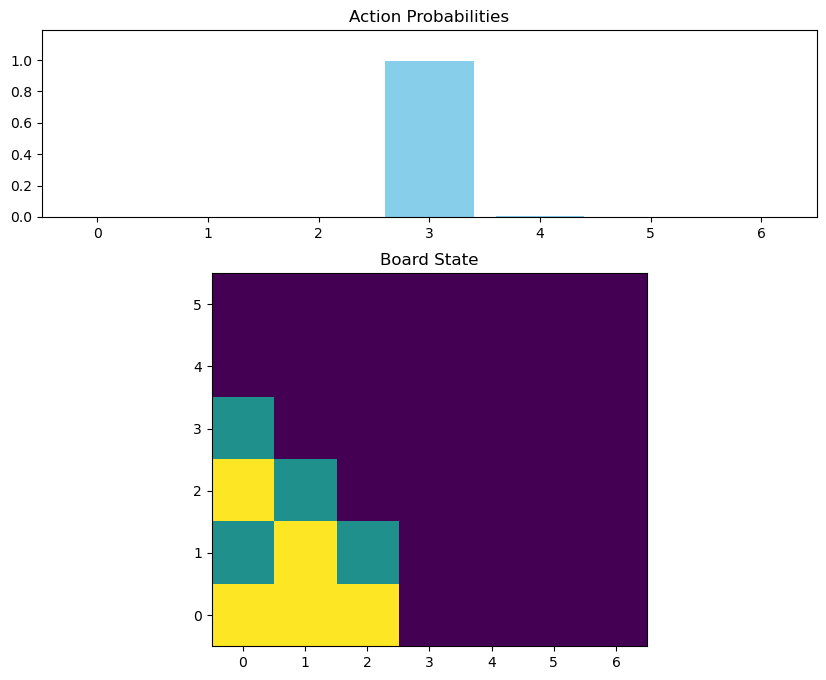

In [20]:
from environment.state import GameState, Piece, Player, Column
from models.utils import fill_board


"""
    0 1
  0 1 0
0 1 0 1
"""

game = GameState()
r = Piece(Player.RED)
y = Piece(Player.YELLOW)
state = GameState(
    board=[
            Column([r, y, r, y]), 
            Column([r, r, y]), 
            Column([r, y]),
            Column([]),
            Column([]),
            Column([]),
            Column([]),
    ]
)

def plot_board_and_probs(board, model):
    board_tensor = fill_board(board, Player.YELLOW)
    # Get model predictions
    input_tensor = board_tensor.unsqueeze(0).unsqueeze(0)  # add batch and channel dimensions
    logits = model.forward(input_tensor)
    probs = torch.softmax(logits, dim=-1).squeeze().detach().numpy()
    
    x_limits = (-0.5, 6.5)

    # Create figure with fixed subplot sizes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2]})

    # Set consistent x-limits for both subplots
    ax1.set_xlim(x_limits)
    ax2.set_xlim(x_limits)

    # Plot probability distribution on top subplot
    ax1.bar(range(7), probs, color='skyblue', align='center')
    ax1.set_xticks(range(7))
    ax1.set_title('Action Probabilities')
    ax1.set_aspect('auto')  # Changed from 'equal' to 'auto'
    ax1.set_ylim(0, max(probs) * 1.2)  # Add some space above the highest bar

    # Plot the board on bottom subplot
    # Use imshow with an extent that uses the same x_limits for proper alignment
    board_img = board_tensor.flip(0)
    ax2.imshow(board_img, extent=(x_limits[0], x_limits[1], -0.5, board_tensor.shape[0]-0.5))
    ax2.set_xticks(range(7))
    ax2.set_aspect('equal')  # Keep 'equal' for the board to maintain square cells
    ax2.set_title('Board State')

plot_board_and_probs(state, model)

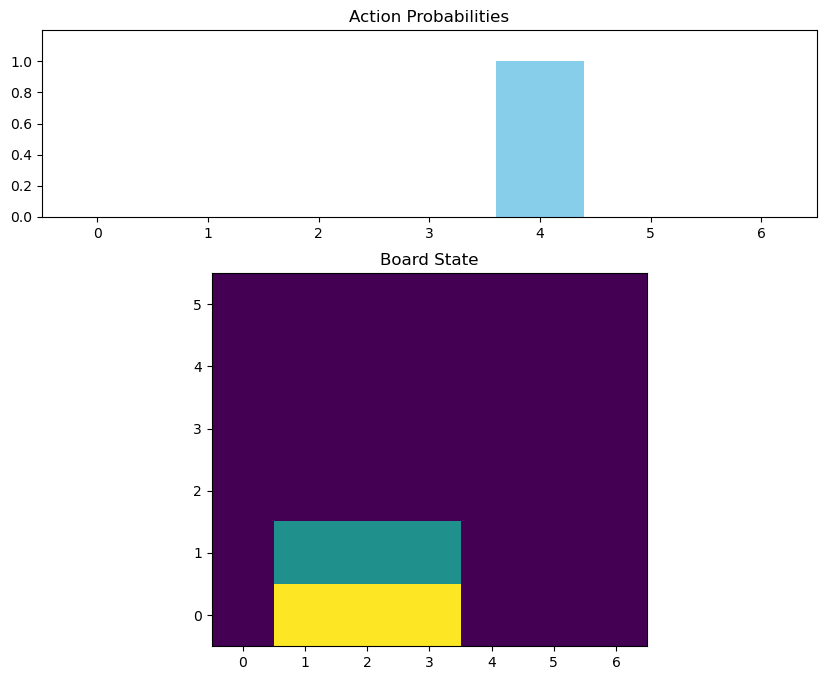

In [ ]:
game = GameState()

r = Piece(Player.RED)
y = Piece(Player.YELLOW)
state = GameState(
    board=[
            Column([]),
            Column([r, y]), 
            Column([r, y]), 
            Column([r, y]),
            Column([]),
            Column([]),
            Column([]),
    ]
)

plot_board_and_probs(state, model)